#### "Playground" session with Spectral Entropy and crosscorrelations.
Poorly documented.

In [1]:
cd ../_data/matlabData/

/home/gustav/Documents/DD142X/code/_data/matlabData


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from h5py import File
def getMatlabValues(fileName):
    with File(fileName, "r") as data:
        return {
            key: np.array(data[key]["values"]).flatten() for key in data.keys()
        }

# Fourier Feature Vector
def ffv(xs, Fs = 16000., epoch_size = 2 ** 11, fft_n = 2 ** 14):

    # Pad with zeroes for more frequency outputs
    # Compare np.fft.fftfreq(n, 1/16000) for n = 2**11, 2**14
    fft_in = np.zeros((xs.shape[0], fft_n))
    fft_in[ : , 0:epoch_size] = xs

    frqs = np.fft.fftfreq(fft_n, 1./Fs)
    lo = np.where(frqs > 12)[0][0]
    hi = np.where(frqs > 30)[0][0]
    fftxs = np.abs(np.fft.fft(fft_in)[:,lo:hi])

    return fftxs, frqs[lo:hi]

In [3]:
mlvals = np.array([v for k, v in getMatlabValues("NPR-075.b11.mat").items()
                  if "str_lfp" in k or "gp_lfp" in k])

In [4]:
def entropy(xs):
    toPDF = np.array([ row / row.sum() for row in xs ** 2])
    return np.array([
            np.array([
                -p * np.log2(p) for p in row
            ]).sum()
        for row in toPDF]) / np.log2(xs.shape[1])

In [5]:
ep = 2 ** 11
nEp = int(mlvals.shape[1] / ep)
mlvals = mlvals[ : , 0 : ep*nEp]

In [6]:
ffvs, _ = ffv(mlvals.reshape((-1, ep)))

In [7]:
entr = entropy(ffvs).reshape((26, -1))

In [8]:
entr.shape

(26, 775)

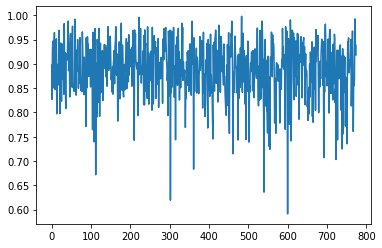

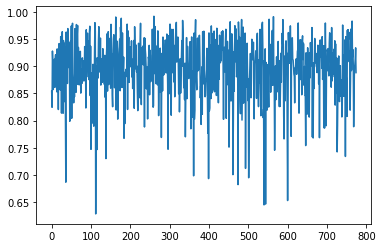

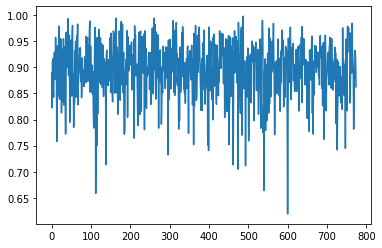

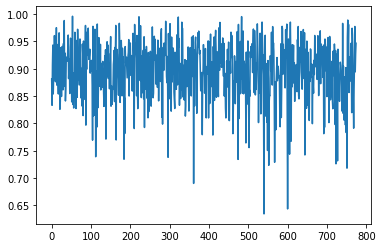

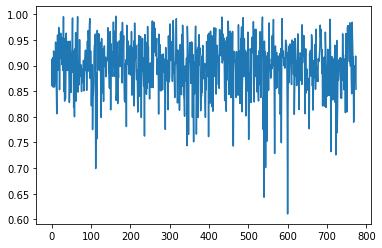

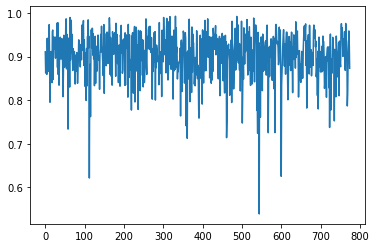

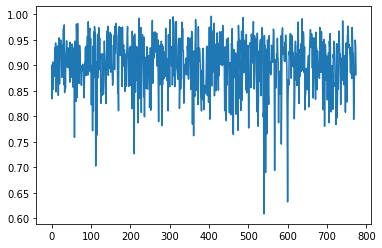

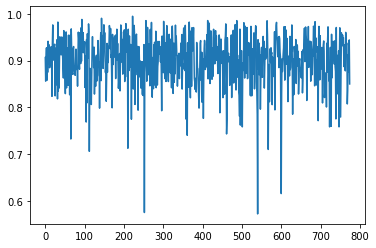

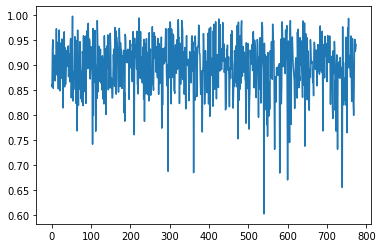

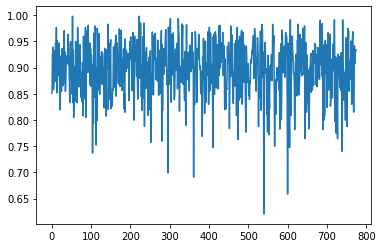

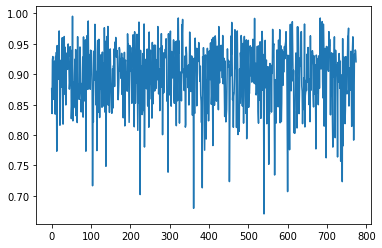

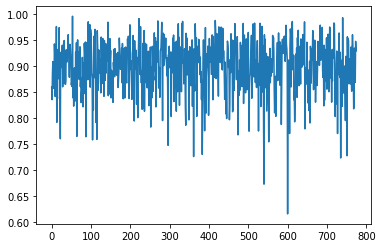

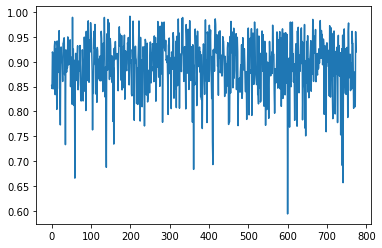

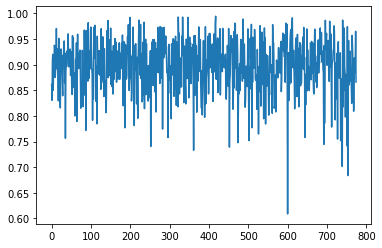

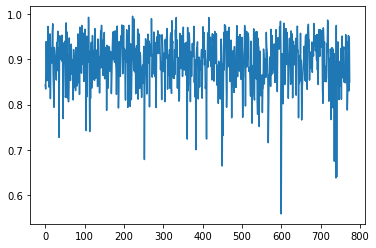

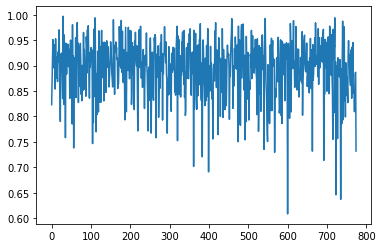

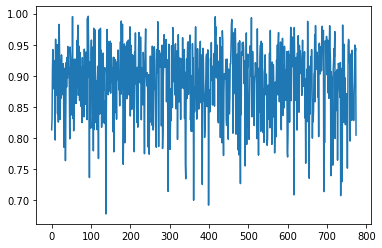

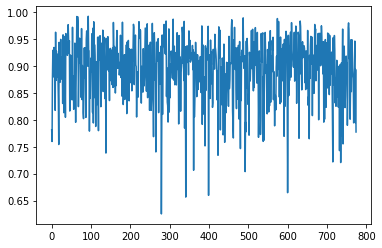

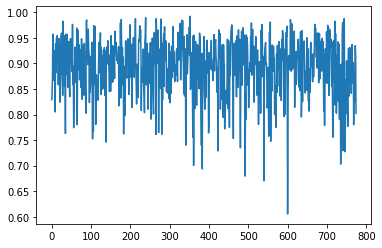

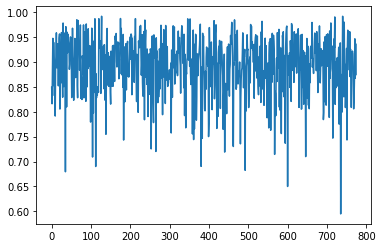

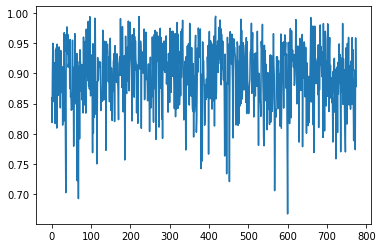

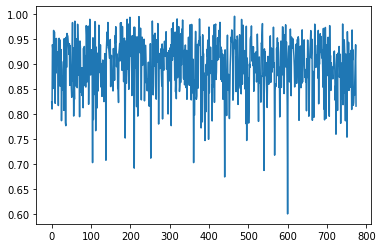

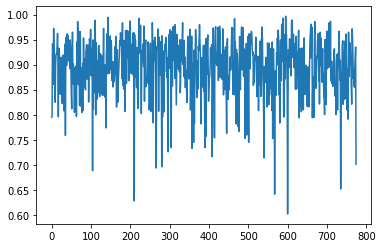

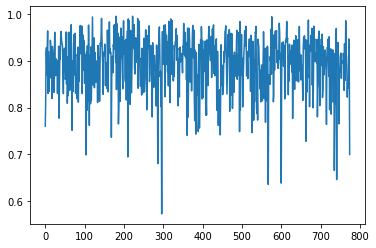

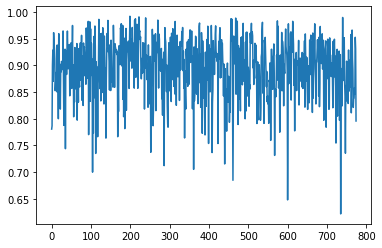

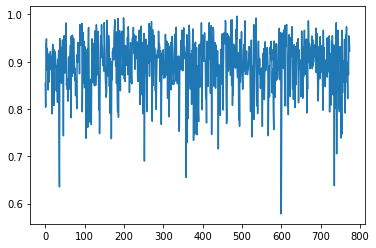

In [9]:
for row in entr:
    plt.clf()
    plt.plot(row)
    plt.show()

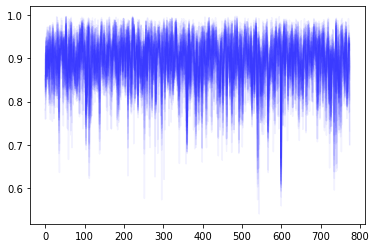

In [10]:
plt.clf()
for row in entr:
    plt.plot(row, 'b', alpha = 0.05)
plt.show()

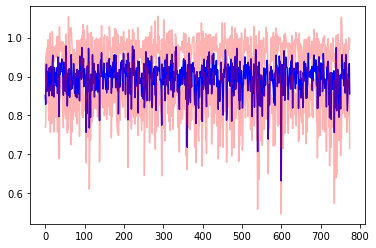

In [11]:
mean_entr = entr.mean(axis = 0)
std_entr = entr.std(axis = 0)

plt.clf()
plt.plot(mean_entr, 'b')
plt.plot(mean_entr + 2 * std_entr, 'r', alpha = 0.3)
plt.plot(mean_entr - 2 * std_entr, 'r', alpha = 0.3)
plt.show()

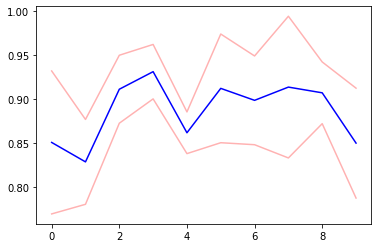

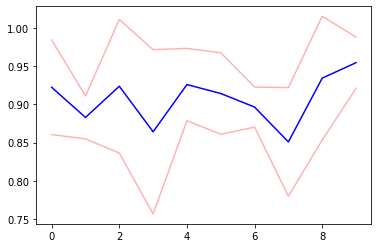

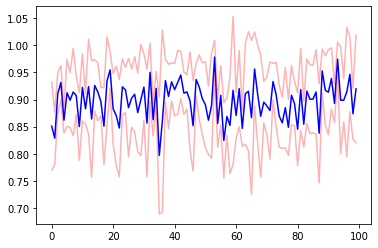

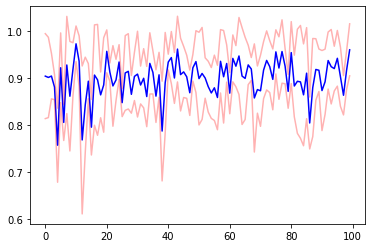

In [12]:
def messaround_plot(epochs, lo = 0):
    plt.clf()
    plt.plot(mean_entr[lo:epochs], 'b')
    plt.plot(mean_entr[lo:epochs] + 2 * std_entr[lo:epochs], 'r', alpha = 0.3)
    plt.plot(mean_entr[lo:epochs] - 2 * std_entr[lo:epochs], 'r', alpha = 0.3)
    plt.show()
    
messaround_plot(10)
messaround_plot(20, 10)
messaround_plot(100)
messaround_plot(200, 100)

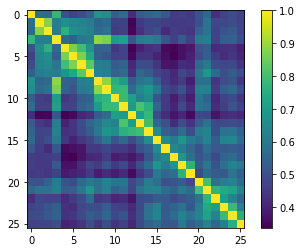

In [13]:
plt.clf()
plt.imshow(np.corrcoef(entr))
plt.colorbar()
plt.show()

In [14]:
mlstr = np.array([
        v for k, v in getMatlabValues("NPR-075.b11.mat").items() if "str_lfp" in k
    ])[ : , 0 : ep*nEp].reshape((-1, ep))

mlgp = np.array([
        v for k, v in getMatlabValues("NPR-075.b11.mat").items() if "gp_lfp" in k
    ])[ : , 0 : ep*nEp].reshape((-1, ep))

entr_str = entropy(ffv(mlstr)[0])
entr_gp = entropy(ffv(mlgp)[0])

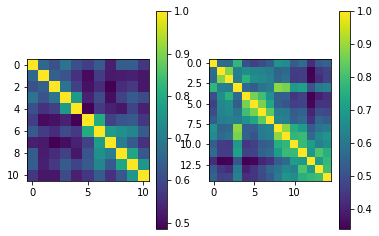

In [16]:
entr_str = entr_str.reshape((-1, nEp))
entr_gp = entr_gp.reshape((-1, nEp))

plt.clf()
plt.subplot(121)
plt.imshow(np.corrcoef(entr_str))
plt.colorbar()
plt.subplot(122)
plt.imshow(np.corrcoef(entr_gp))
plt.colorbar()
plt.show()